In [1]:
# Import relevant packages
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from scipy.stats import norm

In [2]:
tree=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_collectionsNoBIB.root")["tracks_tree"]
treeBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsBIB1[123]0.root")["tracks_tree"]
treeNOBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsNoBIB.root")["tracks_tree"]

In [3]:
print(treeBIB.keys())

['x', 'y', 'z', 't', 'barOrEnd', 'location', 'module', 'layer', 'side']


In [4]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [5]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [6]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 50,
                    'ytick.labelsize' : 50,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

# Investigating per layer occupancy rates

In [7]:
layerPerModule={
    1 : 8,
    2 : 8,
    3 : 3,
    4 : 7,
    5 : 3,
    6 : 4
} #dictionairy to help loop over all layers later

In [8]:
layersBeforeModule={
    1 : 0,
    2 : 8,
    3 : 24,
    4 : 27,
    5 : 41,
    6 : 44
}#Function to help with hashing

In [9]:
surfacearea=layer_area = np.array([270.40, 270.40, 448.50, 448.50, 655.20, 655.20, 904.80, 904.80,  # VXD barrel
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,  # VXD endcaps
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,
                      8117.85, 22034.16, 51678.81,  # IT barrel
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,  # IT endcaps
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,
                      140032.91, 194828.39, 249623.88,  # OT barrel
                      69545.45, 69545.45, 69545.45, 69545.45,  # OT endcaps
                      69545.45, 69545.45, 69545.45, 69545.45])

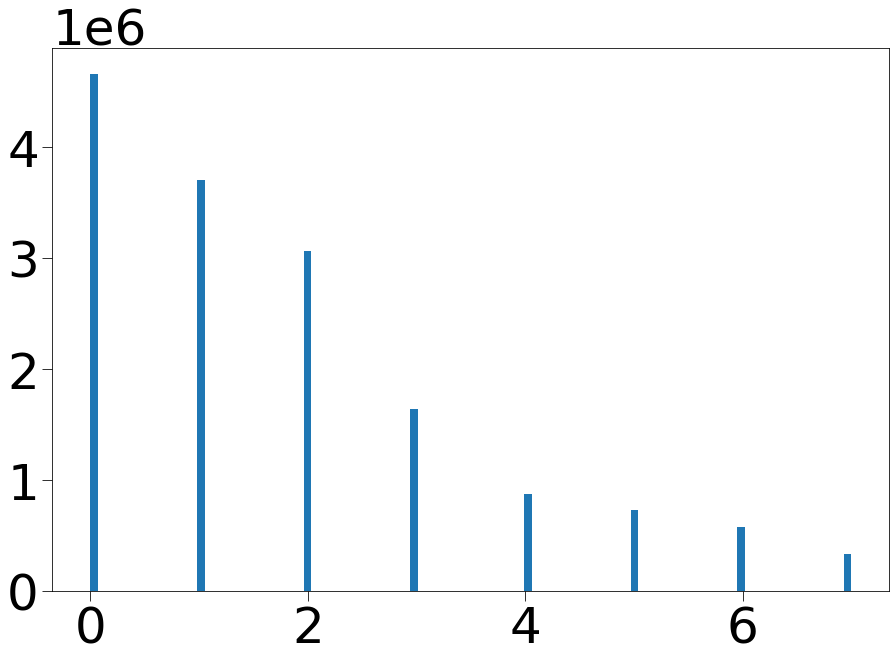

In [10]:
plot1DHistogram(treeBIB["layer"].array(), bins=100)

In [11]:
hits=[] #initializing a array to keep track of hits for each layer
area=[]
for i in range(3):
    inLoc=treeBIB["location"].array()==i
    print("i:")
    print(i)
    print("j:")
    for j in [0,-1,1]:
        print(j)
        inSide=treeBIB["side"].array()==j
        for k in range(layerPerModule[2*i+abs(j)+1]):
            data=inLoc & inSide & (treeBIB["layer"].array()==k)
            hits.append(np.sum(data))
            r=np.sqrt(treeBIB["x"].array()[data]**2+treeBIB["y"].array()[data]**2)
            z=treeBIB["z"].array()[data]
            if j==0:
                area.append(np.pi*2*max(r)*(max(z)-min(z)))
            else:
                area.append((max(r)**2-min(r)**2)*np.pi)
hits=np.array(hits)
area=np.array(area)/100

i:
0
j:
0
-1
1
i:
1
j:
0
-1
1
i:
2
j:
0
-1
1


In [12]:
print(hits/1000)

[ 477.469  406.739  188.642  190.321  141.395  135.427  117.899  117.392
  106.053  107.591  135.96   133.475  155.364  150.637  111.583  109.685
  111.986  111.197  136.425  134.508  152.561  148.619  112.484  112.079
 1849.853  869.475  770.45   413.128  430.024  350.945  263.579  208.396
  144.422  118.169  418.29   430.11   353.456  265.026  219.133  149.629
  122.798  903.139  645.786  457.817  190.64   348.919  339.232  333.929
  190.433  349.249  331.369  321.783]


In [13]:
print(len(hits))

52


In [14]:
print(area)

[   255.92438854    272.06850491    432.20276703    448.26775572
    616.2538621     632.84695175    842.20015906    858.53372906
    379.7963455     380.90452116    378.50975547    373.90174554
    362.30180466    362.42929527    320.29576101    318.95665313
    380.31092517    380.54593236    375.60353404    376.46707713
    363.82916878    360.04323106    319.50348149    320.57760688
   7888.13520706  20745.83676522  48428.05608966   5523.03618676
   9121.44592116   8590.22807636   8534.08660966   8001.54133097
   7485.80030063   7278.63289228   5513.53796838   9121.81834087
   8573.99984009   8519.84117963   7954.20471606   7430.60621772
   7280.53858944 130710.48054044 183762.5671909  237247.67279816
  52616.44657461  52660.13020855  52617.33421175  52683.13047985
  52581.39427642  52591.75805121  52679.3450718   52625.56710041]


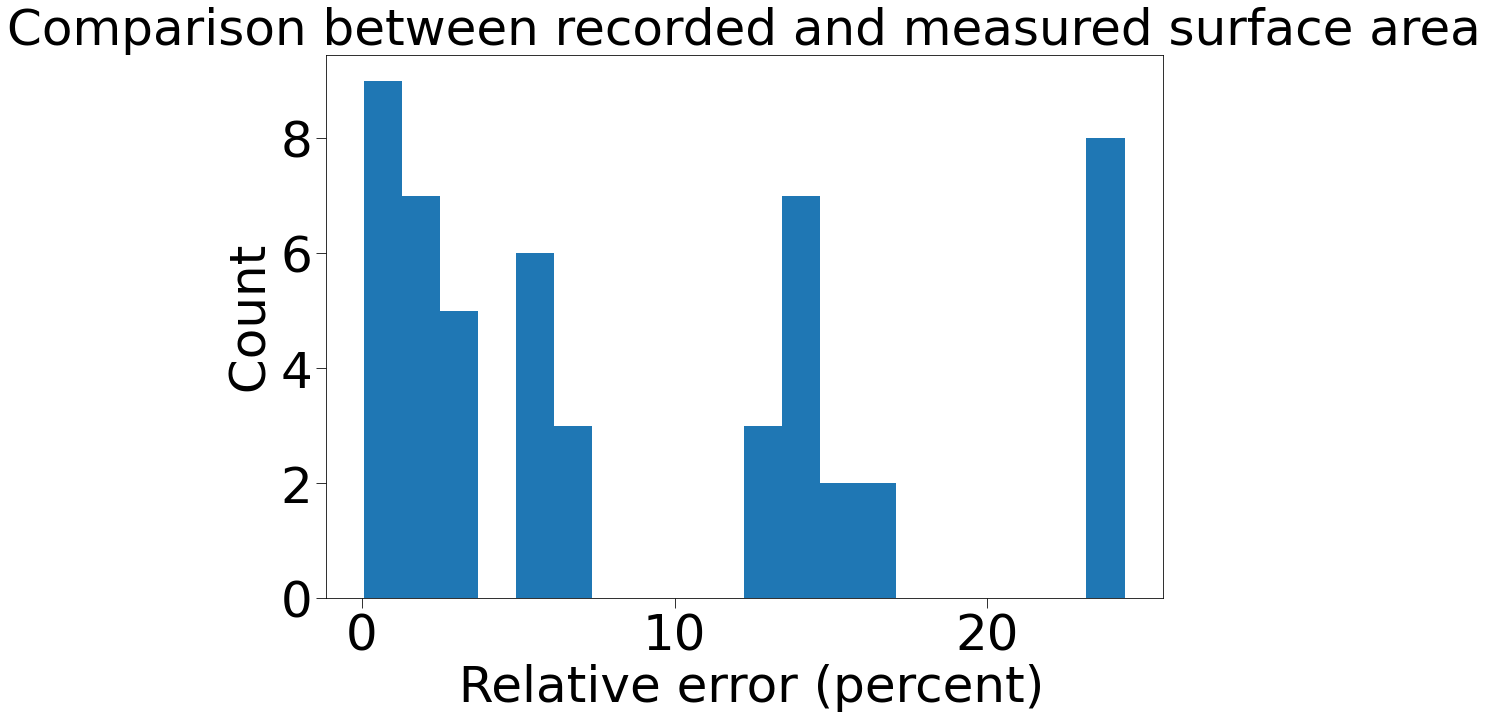

In [15]:
plot1DHistogram(100*abs(surfacearea-area)/surfacearea,bins=20, label="Comparison between recorded and measured surface area; Relative error (percent); Count")

In [16]:
print(surfacearea)

[   270.4     270.4     448.5     448.5     655.2     655.2     904.8
    904.8     389.      389.      378.96    378.96    364.36    364.36
    312.48    312.48    389.      389.      378.96    378.96    364.36
    364.36    312.48    312.48   8117.85  22034.16  51678.81   6639.65
  10611.59  10078.04   9900.19   9307.37   8595.98   8299.56   6639.65
  10611.59  10078.04   9900.19   9307.37   8595.98   8299.56 140032.91
 194828.39 249623.88  69545.45  69545.45  69545.45  69545.45  69545.45
  69545.45  69545.45  69545.45]


In [17]:
label=[]
for i in range(6):
    #Adding the SI tracker type to the label
    if i//2==0:
        cur="V"
    elif i//2 ==1:
        cur="I"
    else:
        cur="O"
    
    #Adding if its an endcap or a barrel to label
    if (i %2)==0:
        cur+="B"
    else:
        cur+="E"
        
    for j in range(layerPerModule[i+1]):
        label.append(cur+str(j))

In [18]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 50,
                    'ytick.labelsize' : 50,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

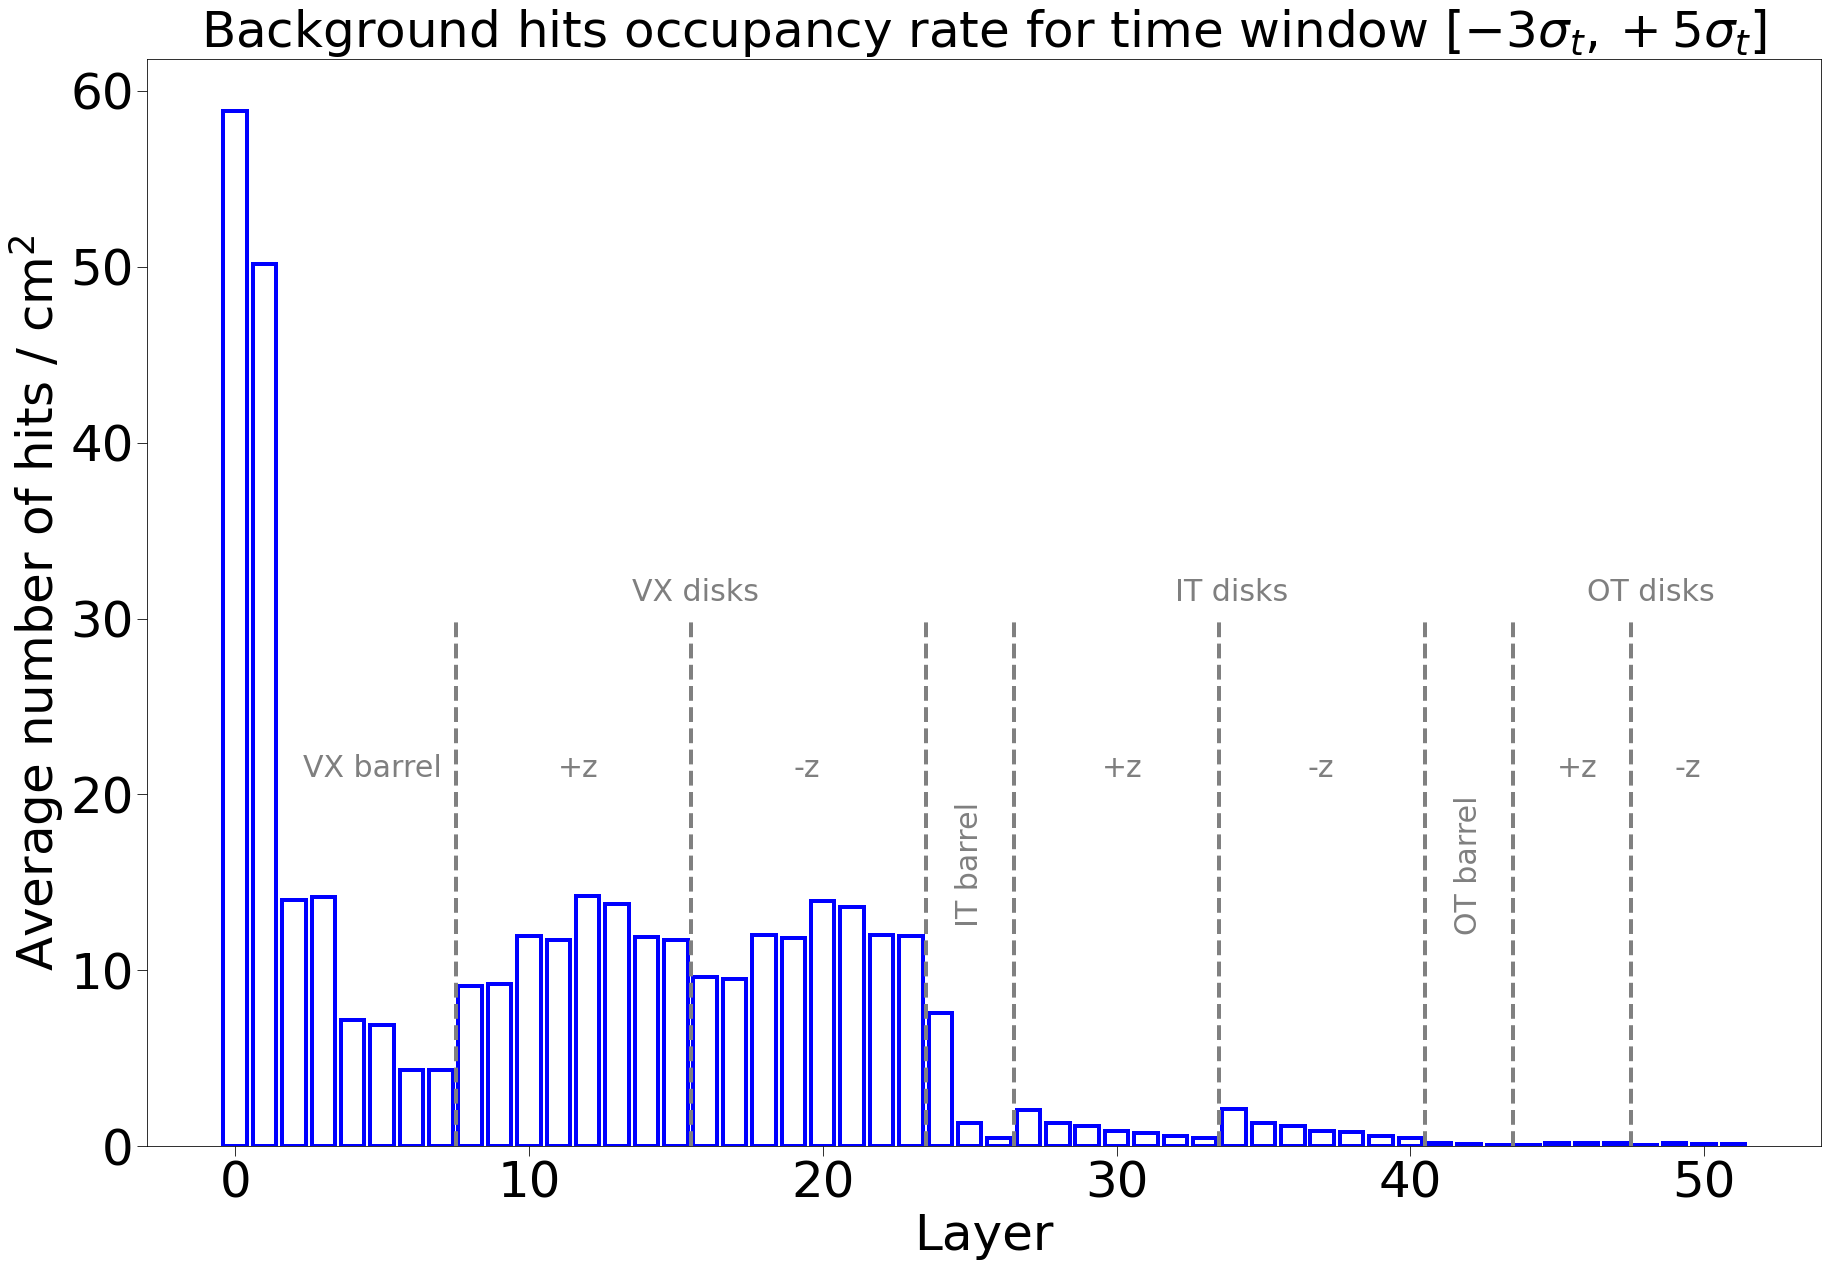

In [19]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

ax.bar(range(52), (hits/surfacearea)/30, fill=False, linewidth=4, edgecolor="blue")

ax.vlines(7.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(2.3,21, "VX barrel", fontsize=30, alpha=0.5)
ax.vlines(15.50, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(13.5,31, "VX disks", fontsize=30, alpha=0.5)
ax.vlines(23.50, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(11,21, "+z", fontsize=30, alpha=0.5)
ax.text(19,21, "-z", fontsize=30, alpha=0.5)
ax.vlines(26.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(24.5,16, "IT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)
ax.vlines(33.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(32,31, "IT disks", fontsize=30, alpha=0.5)
ax.vlines(40.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(29.5,21, "+z", fontsize=30, alpha=0.5)
ax.text(36.5,21, "-z", fontsize=30, alpha=0.5)
ax.vlines(43.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(41.5,16, "OT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)
ax.vlines(47.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(46,31, "OT disks", fontsize=30, alpha=0.5)
ax.text(45,21, "+z", fontsize=30, alpha=0.5)
ax.text(49,21, "-z", fontsize=30, alpha=0.5)


ax.set_ylabel(f"Average number of hits / cm$^2$")
ax.set_xlabel("Layer")
ax.set_title("Background hits occupancy rate for time window $[-3\sigma_t,+5\sigma_t]$")
plt.savefig("occupancy.png")

Text(0.5, 1.0, 'Background hits for time window $[-3\\sigma_t,+5\\sigma_t]$')

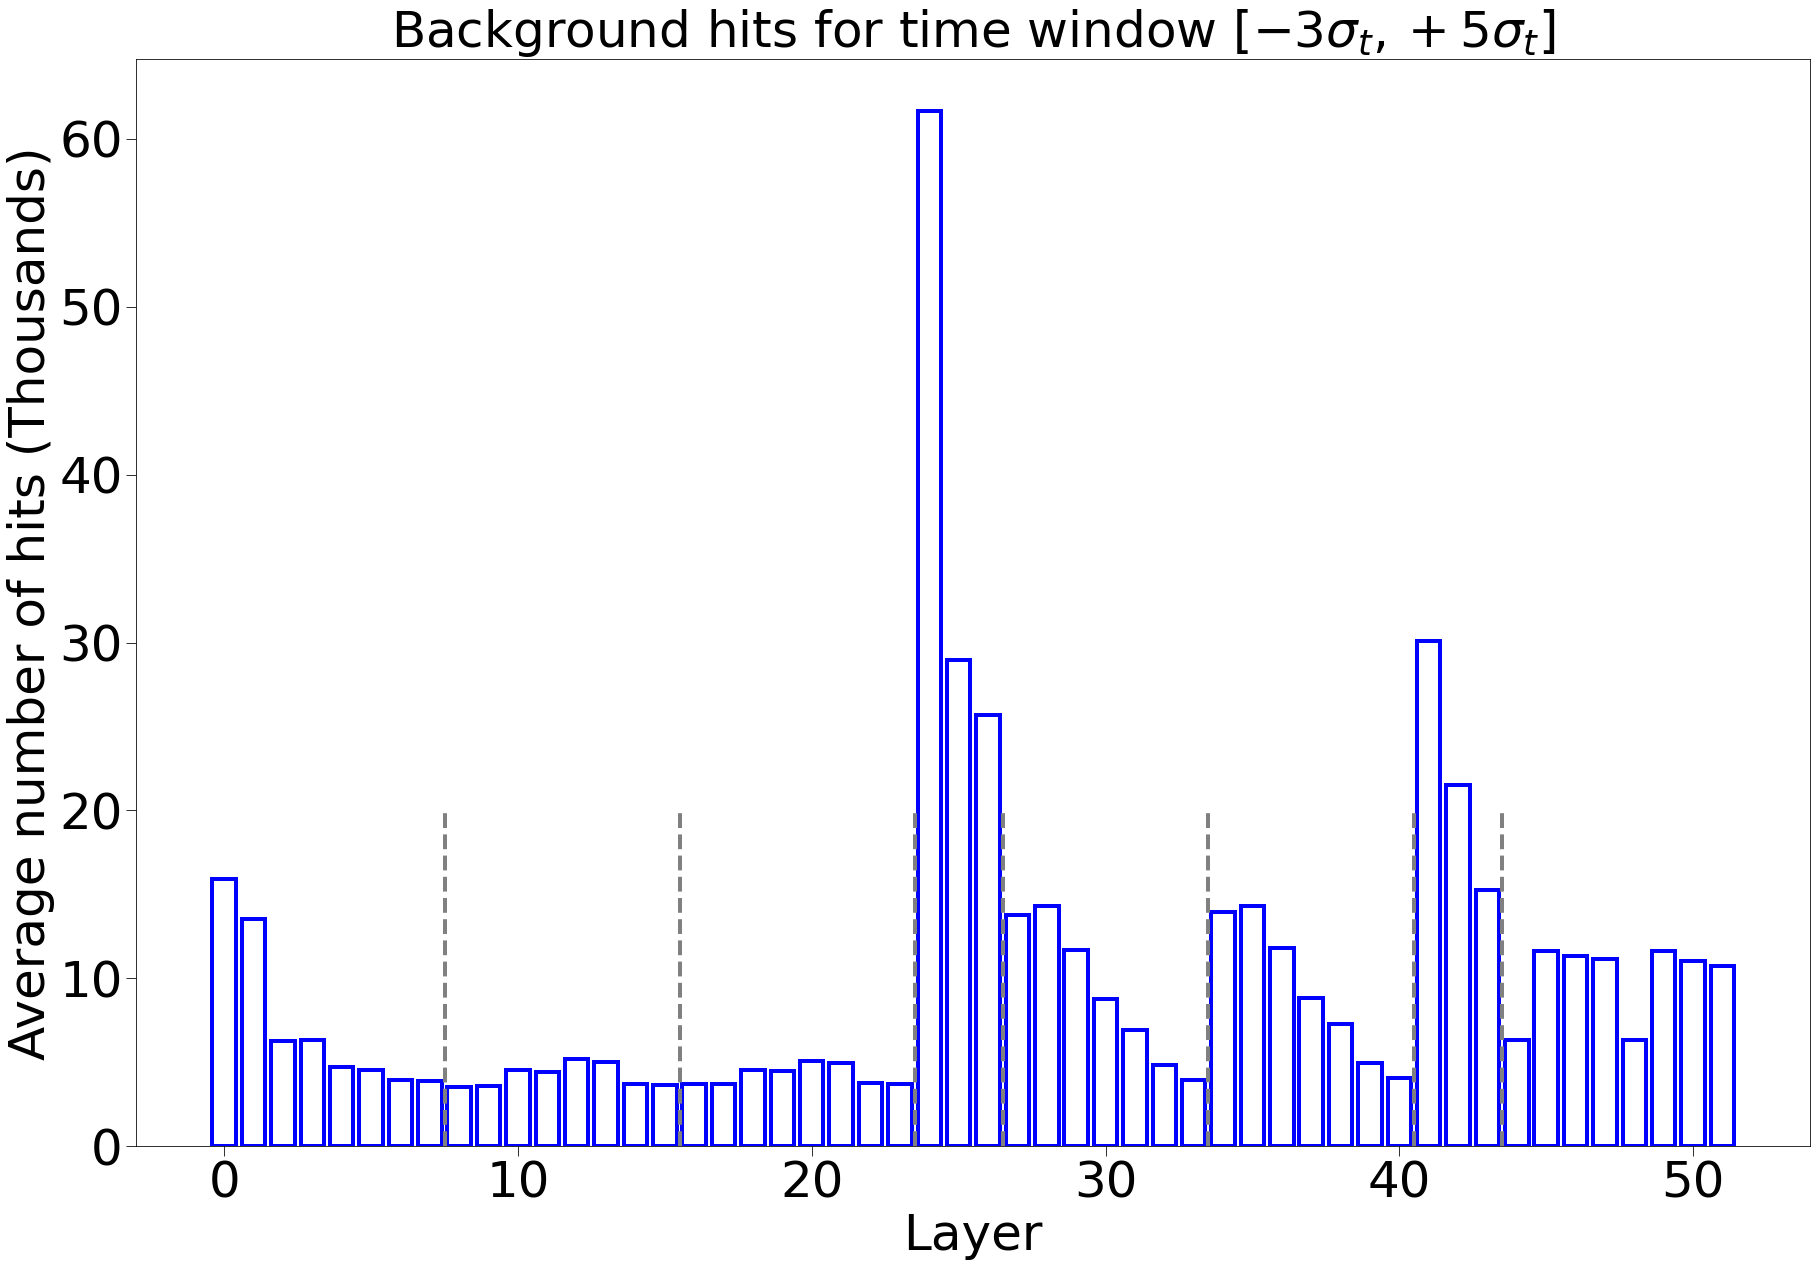

In [22]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
ax.bar(range(52), hits/30000, fill=False, linewidth=4, edgecolor="blue")

ax.vlines(7.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)
ax.vlines(15.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)
ax.vlines(23.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)
ax.vlines(26.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)
ax.vlines(33.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)
ax.vlines(40.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)
ax.vlines(43.5, ymin=0, ymax=20, colors="grey", linestyle="dashed", linewidth=4)

ax.set_ylabel(f"Average number of hits (Thousands)")
ax.set_xlabel("Layer")
ax.set_title("Background hits for time window $[-3\sigma_t,+5\sigma_t]$")
#plt.savefig("hits.png")

Text(0.5, 1.0, 'Area of tracker layers')

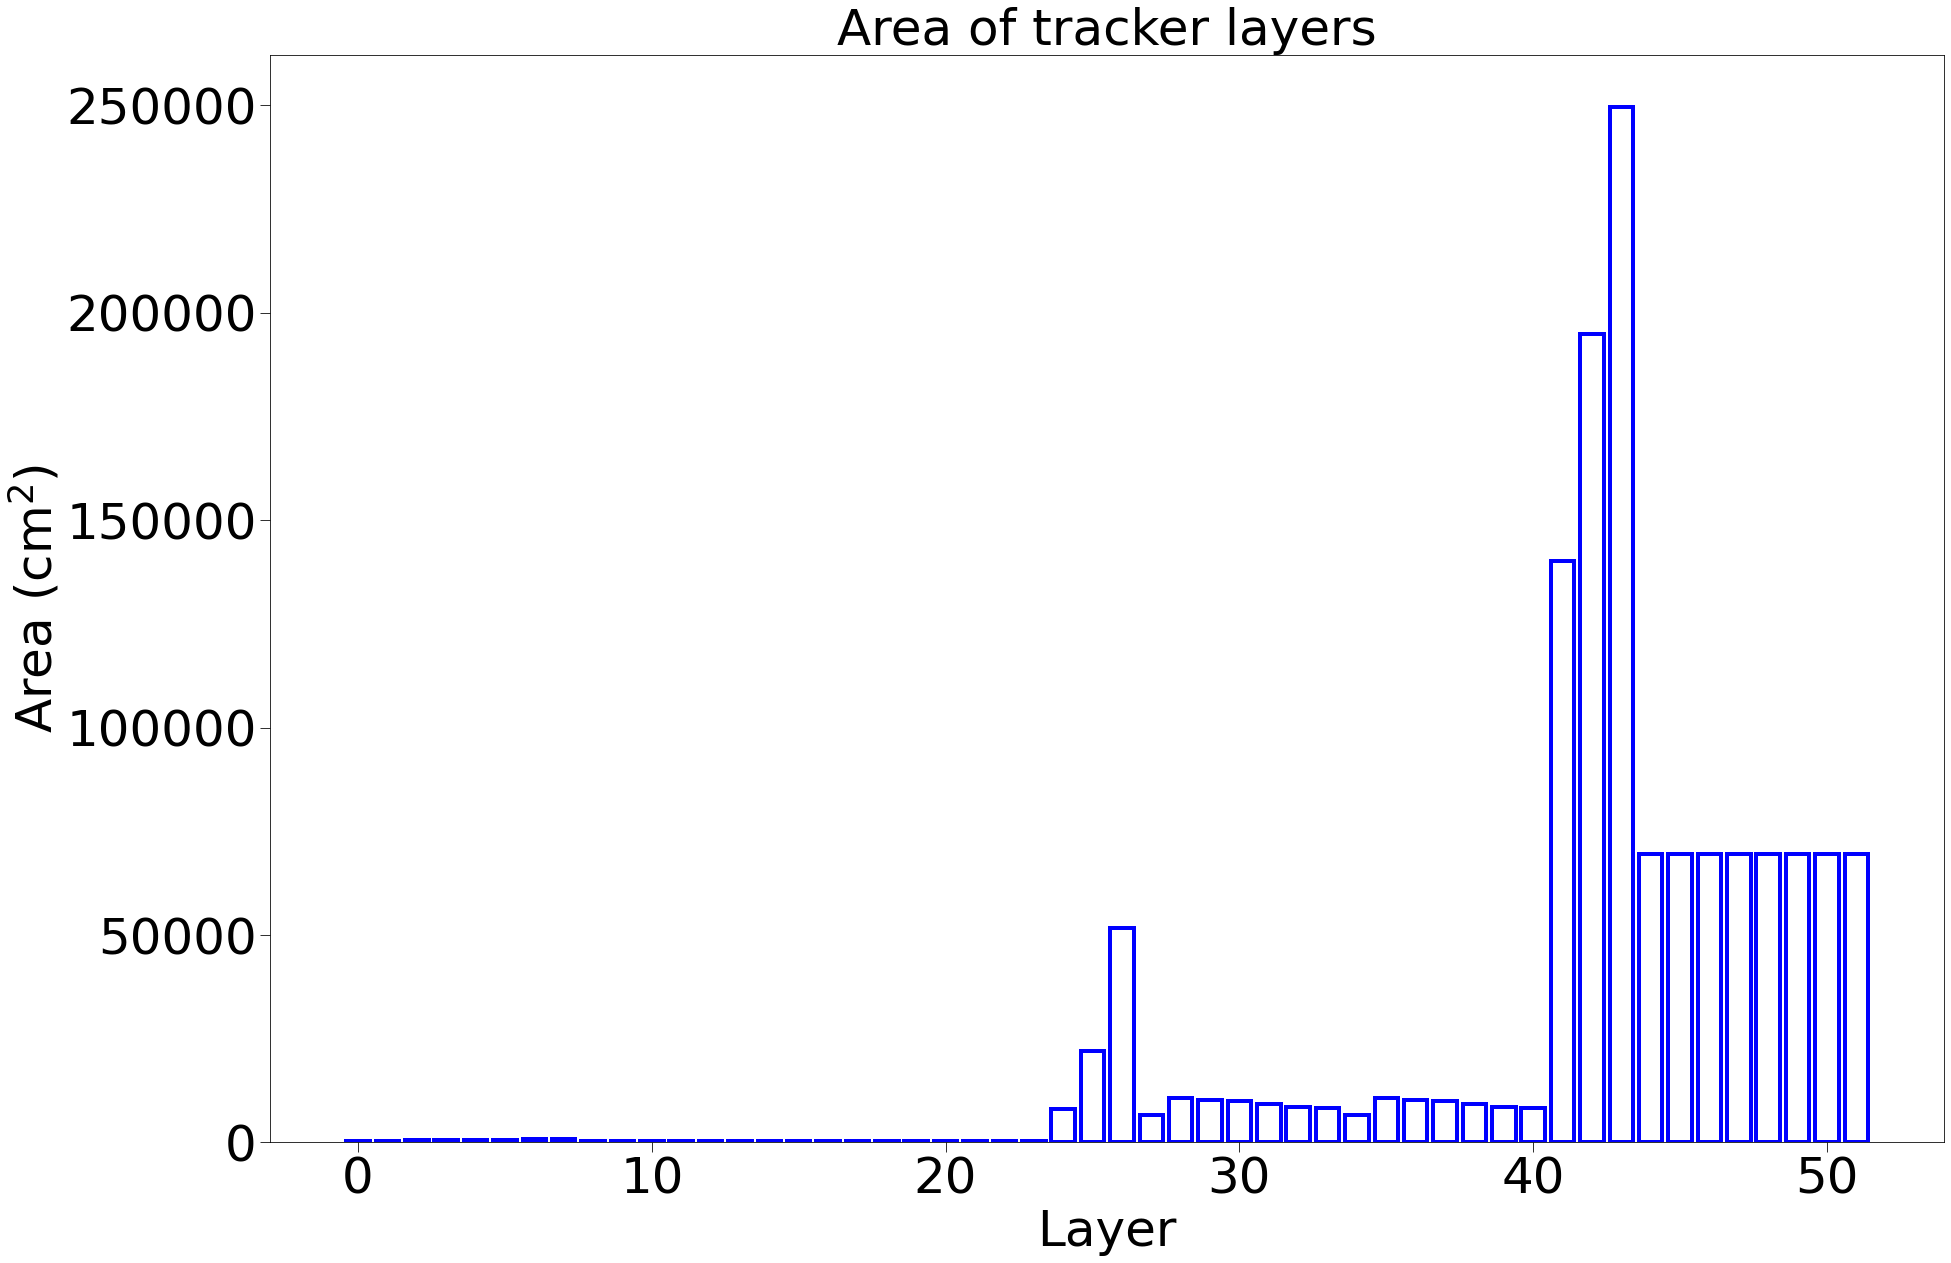

In [21]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
#plt.rcParams.update({'axes.labelsize' : "large"}) 

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
ax.bar(range(52), surfacearea, fill=False, linewidth=4, edgecolor="blue")
ax.set_ylabel(f"Area (cm$^2)$")
ax.set_xlabel("Layer")
ax.set_title("Area of tracker layers")
#plt.savefig("area.png")